In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [17]:
df1 = pd.read_csv('../data/raw/브라질-Carmo de Minas.csv')
df2 = pd.read_csv('../data/raw/에티오피아-Sidamo.csv')

In [18]:
# 컬럼명 앞뒤 공백 제거 (혹시 모를 문제 방지)
df1.columns = df1.columns.str.strip()
df2.columns = df2.columns.str.strip()

# 날짜 컬럼 만들기
df1['DATE'] = pd.to_datetime(df1[['YEAR', 'MO', 'DY']].rename(columns={'YEAR': 'year', 'MO': 'month', 'DY': 'day'}))
df2['DATE'] = pd.to_datetime(df2[['YEAR', 'MO', 'DY']].rename(columns={'YEAR': 'year', 'MO': 'month', 'DY': 'day'}))

# T2M 결측 여부 표시
df1['T2M_NAN'] = (df1['T2M'] == -999).astype(int)
df2['T2M_NAN'] = (df2['T2M'] == -999).astype(int)

print(df1['T2M_NAN'])

0       0
1       0
2       0
3       0
4       0
       ..
3739    1
3740    1
3741    1
3742    1
3743    1
Name: T2M_NAN, Length: 3744, dtype: int64


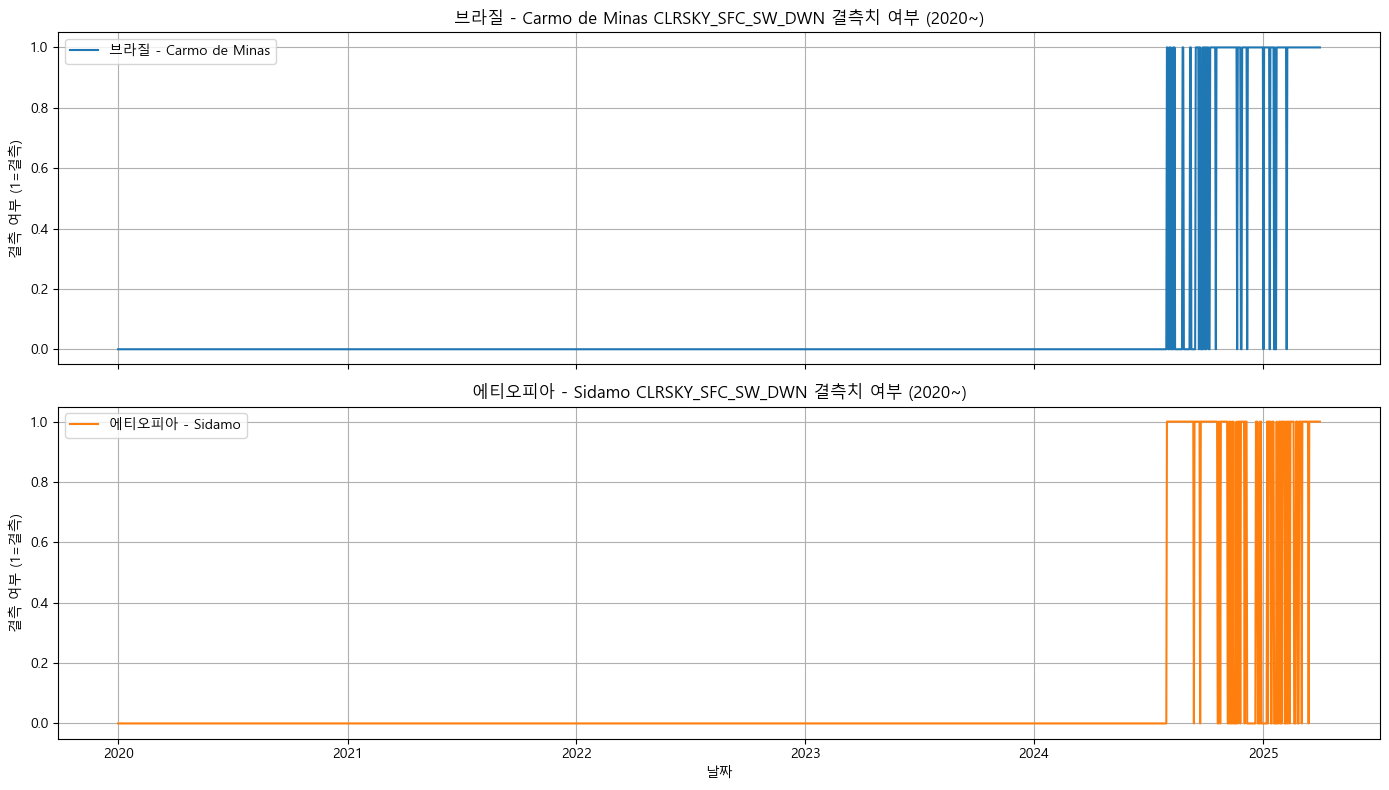

In [25]:
# 한글 폰트 설정
mpl.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

# 2020년 이후 데이터 필터링
df1_2020 = df1[df1['DATE'] >= '2020-01-01']
df2_2020 = df2[df2['DATE'] >= '2020-01-01']

# 시각화 (2개의 서브플롯)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

# 브라질 (위)
ax1.plot(df1_2020['DATE'], (df1_2020['CLRSKY_SFC_SW_DWN'] == -999.0).astype(int), color='tab:blue', label='브라질 - Carmo de Minas')
ax1.set_title('브라질 - Carmo de Minas CLRSKY_SFC_SW_DWN 결측치 여부 (2020~)')
ax1.set_ylabel('결측 여부 (1=결측)')
ax1.legend()
ax1.grid(True)

# 에티오피아 (아래)
ax2.plot(df2_2020['DATE'], (df2_2020['CLRSKY_SFC_SW_DWN'] == -999.0).astype(int), color='tab:orange', label='에티오피아 - Sidamo')
ax2.set_title('에티오피아 - Sidamo CLRSKY_SFC_SW_DWN 결측치 여부 (2020~)')
ax2.set_xlabel('날짜')
ax2.set_ylabel('결측 여부 (1=결측)')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()
